In [1]:
%load_ext autoreload
%autoreload 2

In [118]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression, make_friedman1
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Experiment 1: 1 Feature, 1000 samples, vary the quantity of data we're using

In [20]:
X, y, true_coef = make_regression(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=1000,
    random_state=42,
    coef=True
)

## Using 10 data points

In [27]:
scores = []
for threshold in range(10, 1000, 10):
    linreg = LinearRegression()
    X_sub = X[:threshold]
    y_sub = y[:threshold]
    scores.append(np.mean(cross_val_score(linreg, X_sub, y_sub)))

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

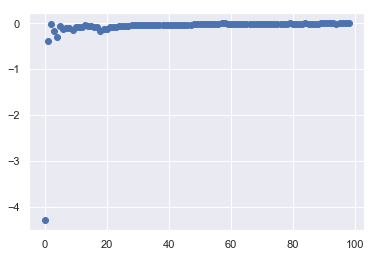

In [28]:
plt.scatter(range(len(scores)), scores, )

In [37]:
scores = []
for alpha in np.arange(0, 1000):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    scores.append(ridge.score(X, y))

In [39]:
X, y, true_coef = make_regression(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_targets=1,
    noise=1000,
    random_state=42,
    coef=True
)

In [40]:
scores = []
for alpha in np.arange(0, 1000):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    scores.append(ridge.score(X, y))

In [41]:
scores

[0.005659628519106841,
 0.005659622381248619,
 0.005659604019032871,
 0.0056595735091339305,
 0.005659530927744294,
 0.00565947635057773,
 0.005659409852872943,
 0.005659331509396459,
 0.005659241394445735,
 0.005659139581853934,
 0.005659026144991031,
 0.005658901156768592,
 0.005658764689641993,
 0.005658616815614859,
 0.005658457606240175,
 0.005658287132625839,
 0.005658105465435659,
 0.005657912674893573,
 0.005657708830786645,
 0.005657494002467511,
 0.005657268258857706,
 0.005657031668450996,
 0.005656784299315931,
 0.005656526219098512,
 0.0056562574950255184,
 0.005655978193907285,
 0.005655688382141366,
 0.00565538812571309,
 0.00565507749020111,
 0.005654756540778294,
 0.005654425342215497,
 0.005654083958883782,
 0.00565373245475731,
 0.005653370893416443,
 0.005652999338049747,
 0.005652617851457098,
 0.005652226496052237,
 0.0056518253338654345,
 0.005651414426545487,
 0.005650993835364049,
 0.005650563621216076,
 0.005650123844623822,
 0.005649674565738172,
 0.005649215

# Experiment 2: Friedman Data

In [44]:
X, y = make_friedman1(n_samples=100, n_features=10, noise=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [54]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.score(X_train, y_train)

0.7590115322239542

In [71]:
np.mean(cross_val_score(linreg, X_train, y_train, cv=5))

0.6720425021370491

In [72]:
ridge_reg = Ridge(alpha=0.5)

In [73]:
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_train, y_train)

0.7545621167794796

In [74]:
np.mean(cross_val_score(ridge_reg, X_train, y_train, cv=5))

0.6763195294506741

In [75]:
np.mean(cross_val_score(Ridge(alpha=1), X_train, y_train, cv=5))

0.6658000043983707

In [76]:
np.mean(cross_val_score(Ridge(alpha=10), X_train, y_train, cv=5))

0.3713699789053579

In [77]:
np.mean(cross_val_score(Ridge(alpha=50), X_train, y_train, cv=5))

0.0917290904600411

## Let's try adding in some non-linear features

In [78]:
X_train_quad = np.append(X_train, X_train**2, axis=1)

In [79]:
linreg = LinearRegression()
linreg.fit(X_train_quad, y_train)
linreg.score(X_train_quad, y_train)

0.9355338937110594

In [80]:
np.mean(cross_val_score(linreg, X_train_quad, y_train, cv=5))

0.8045851766923532

In [82]:
print(np.mean(cross_val_score(Ridge(alpha=1), X_train_quad, y_train, cv=5)))

0.6739717809528623


In [83]:
print(np.mean(cross_val_score(Ridge(alpha=0), X_train_quad, y_train, cv=5)))

0.8045851766923517


In [84]:
print(np.mean(cross_val_score(Ridge(alpha=0.01), X_train_quad, y_train, cv=5)))
print(np.mean(cross_val_score(Ridge(alpha=0.2), X_train_quad, y_train, cv=5)))
print(np.mean(cross_val_score(Ridge(alpha=0.5), X_train_quad, y_train, cv=5)))
print(np.mean(cross_val_score(Ridge(alpha=1), X_train_quad, y_train, cv=5)))
print(np.mean(cross_val_score(Ridge(alpha=5), X_train_quad, y_train, cv=5)))

0.8174158091142596
0.76480671770063
0.7092404833687336
0.6739717809528623
0.5725174820315229


## Regularizing is only hurting the model here, so I think we're still underfitting

In [87]:
X_train_more_features = np.append(X_train, X_train**2, axis=1)
X_train_more_features = np.append(X_train_more_features, np.log(X_train), axis=1)
X_train_more_features = np.append(X_train_more_features, np.sqrt(X_train), axis=1)
X_train_more_features = np.append(X_train_more_features, X_train**3, axis=1)
X_train_more_features = np.append(X_train_more_features, X_train**4, axis=1)
X_train_more_features = np.append(X_train_more_features, X_train**5, axis=1)
X_train_more_features = np.append(X_train_more_features, X_train**6, axis=1)

In [88]:
np.mean(cross_val_score(LinearRegression(), X_train_more_features, y_train, cv=5))

-2.5490351831731903

In [89]:
print(np.mean(cross_val_score(Ridge(alpha=0.01), X_train_more_features, y_train, cv=5)))
print(np.mean(cross_val_score(Ridge(alpha=0.2), X_train_more_features, y_train, cv=5)))
print(np.mean(cross_val_score(Ridge(alpha=0.5), X_train_more_features, y_train, cv=5)))
print(np.mean(cross_val_score(Ridge(alpha=1), X_train_more_features, y_train, cv=5)))
print(np.mean(cross_val_score(Ridge(alpha=5), X_train_more_features, y_train, cv=5)))

0.7396814416747526
0.8134453606517498
0.8122657868942884
0.798111939280816
0.7430677064232133


In [94]:
for alpha in np.arange(0.10, 1.01, 0.01):
    print("alpha: {} —".format(round(alpha, 2)), np.mean(cross_val_score(Ridge(alpha=alpha), X_train_more_features, y_train, cv=5)))

alpha: 0.1 — 0.8032540046784705
alpha: 0.11 — 0.8050570305148028
alpha: 0.12 — 0.8066062410251551
alpha: 0.13 — 0.8079436793110947
alpha: 0.14 — 0.809101965558923
alpha: 0.15 — 0.810106937696335
alpha: 0.16 — 0.8109794241985311
alpha: 0.17 — 0.8117364704275941
alpha: 0.18 — 0.8123922091614368
alpha: 0.19 — 0.812958492638414
alpha: 0.2 — 0.8134453606517498
alpha: 0.21 — 0.8138613933826404
alpha: 0.22 — 0.8142139815718963
alpha: 0.23 — 0.8145095363428674
alpha: 0.24 — 0.8147536542513916
alpha: 0.25 — 0.8149512486312116
alpha: 0.26 — 0.8151066552282232
alpha: 0.27 — 0.8152237179819309
alpha: 0.28 — 0.8153058593061105
alpha: 0.29 — 0.8153561381418666
alpha: 0.3 — 0.8153772982733642
alpha: 0.31 — 0.815371808820944
alpha: 0.32 — 0.815341898398431
alpha: 0.33 — 0.8152895840996924
alpha: 0.34 — 0.8152166962353409
alpha: 0.35 — 0.8151248995531851
alpha: 0.36 — 0.8150157115313574
alpha: 0.37 — 0.8148905182201315
alpha: 0.38 — 0.8147505880198029
alpha: 0.39 — 0.814597083711835
alpha: 0.4 — 0.8144

In [99]:
alpha_vals = []
for alpha in np.arange(0.10, 1.01, 0.01):
    alpha_vals.append((round(alpha, 2), np.mean(cross_val_score(Ridge(alpha=alpha), X_train_more_features, y_train, cv=5))))

In [100]:
sorted(alpha_vals, key=lambda x: x[1], reverse=True)

[(0.3, 0.8153772982733642),
 (0.31, 0.815371808820944),
 (0.29, 0.8153561381418666),
 (0.32, 0.815341898398431),
 (0.28, 0.8153058593061105),
 (0.33, 0.8152895840996924),
 (0.27, 0.8152237179819309),
 (0.34, 0.8152166962353409),
 (0.35, 0.8151248995531851),
 (0.26, 0.8151066552282232),
 (0.36, 0.8150157115313574),
 (0.25, 0.8149512486312116),
 (0.37, 0.8148905182201315),
 (0.24, 0.8147536542513916),
 (0.38, 0.8147505880198029),
 (0.39, 0.814597083711835),
 (0.23, 0.8145095363428674),
 (0.4, 0.814431073004474),
 (0.41, 0.8142535378092616),
 (0.22, 0.8142139815718963),
 (0.42, 0.8140653824285466),
 (0.43, 0.8138674408047978),
 (0.21, 0.8138613933826404),
 (0.44, 0.8136604829584083),
 (0.2, 0.8134453606517498),
 (0.45, 0.8134452207210743),
 (0.46, 0.8132223128554814),
 (0.47, 0.8129923696386557),
 (0.19, 0.812958492638414),
 (0.48, 0.8127559569750218),
 (0.49, 0.8125136000959001),
 (0.18, 0.8123922091614368),
 (0.5, 0.8122657868942882),
 (0.51, 0.812012970937061),
 (0.52, 0.81175557419121

So our max model score comes from ridge regression with an alpha value of 0.3.

And notice that earlier, our linear model now does abysmally in the cross-validated score, because I think it's overfitting so badly.

In [101]:
linreg.fit(X_train_more_features, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [102]:
linreg.score(X_train_more_features, y_train)

1.0

But it does perfectly on training data. So yep, that's a clear sign of overfitting.

## Model complexity vs. score — I.e., let's overfit the hell out of this thing!
Actually, this is a great opportunity to look at the effect of model complexity on cross-validated score using linear regression and subsets of the features we've been creating.

In [103]:
X_train.shape

(75, 10)

In [115]:
X_train_more_features_1 = np.append(X_train, X_train**2, axis=1)
X_train_more_features_2 = np.append(X_train_more_features_1, np.log(X_train), axis=1)
X_train_more_features_3 = np.append(X_train_more_features_2, np.sqrt(X_train), axis=1)
X_train_more_features_4 = np.append(X_train_more_features_3, X_train**3, axis=1)
X_train_more_features_5 = np.append(X_train_more_features_4, X_train**4, axis=1)
X_train_more_features_6 = np.append(X_train_more_features_5, X_train**5, axis=1)
X_train_more_features_7 = np.append(X_train_more_features_6, X_train**6, axis=1)

X_list = [
    X_train_more_features_1,
    X_train_more_features_2,
    X_train_more_features_3,
    X_train_more_features_4,
    X_train_more_features_5,
    X_train_more_features_6,
    X_train_more_features_7,
]

In [121]:
# Training score
training_mse = []
for X_expanded in X_list:
    linreg = LinearRegression()
    linreg.fit(X_expanded, y_train)
    y_pred = linreg.predict(X_expanded)
    score = linreg.score(X_expanded, y_train)
    mse = mean_squared_error(y_train, y_pred)
    training_mse.append(mse)
    print(score, mse)

0.9355338937110594 1.769339588566453
0.9516718203697521 1.326417343710705
0.9630647183763699 1.013727363936528
0.972808448262513 0.7463005249309186
0.9907490291371153 0.25390255318064175
0.9974500037040315 0.06998731049356374
1.0 7.493115513025843e-23


In [122]:
# Cross-validation score
validation_mse = []
for X_expanded in X_list:
    linreg = LinearRegression()
    linreg.fit(X_expanded, y_train)
    score = np.mean(cross_val_score(linreg, X_expanded, y_train, cv=5))
    mse = -np.mean(cross_val_score(linreg, X_expanded, y_train, cv=5, scoring='neg_mean_squared_error'))
    validation_mse.append(mse)
    print(score, mse)

0.8045851766923532 4.9611407485055645
0.7837312312808785 5.55530604802025
0.5496913429722882 11.963671078360315
-7.007547633198611 234.79759586366464
-27.161857920060648 764.1728684315206
-6.005797796013975 175.88757108014116
-2.5490351831731903 80.63956981395407


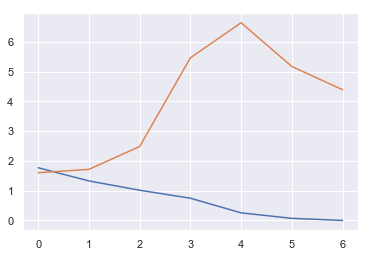

In [126]:
plt.plot(range(len(training_mse)), training_mse)
plt.plot(range(len(validation_mse)), np.log(validation_mse))

## Trying to do it right w/ Ridge regression

In [131]:
training_mse_ridge = []
validation_mse_ridge = []
for X_expanded in X_list:
    ridge_reg = Ridge(alpha=0.3)
    ridge_reg.fit(X_expanded, y_train)
    y_pred = ridge_reg.predict(X_expanded)

    # Training score
    train_score = ridge_reg.score(X_expanded, y_train)
    train_mse = mean_squared_error(y_train, y_pred)
    training_mse_ridge.append(train_mse)
    
    # Validation score
    cv_score = np.mean(cross_val_score(ridge_reg, X_expanded, y_train, cv=5))
    cv_mse = -np.mean(cross_val_score(ridge_reg, X_expanded, y_train, cv=5, scoring='neg_mean_squared_error'))
    validation_mse_ridge.append(cv_mse)

    print(train_score, train_mse, "|||", cv_score, cv_mse)

0.8481115757624085 4.16873637200966 ||| 0.7398245974552926 7.115464971698975
0.914583438345322 2.344346707981281 ||| 0.7706227502791384 5.657866697322964
0.920485907808838 2.1823472714821173 ||| 0.7821648514892523 5.410304181717079
0.9349411569548587 1.785607867646996 ||| 0.8032191526547244 4.93514015124145
0.9419866792717405 1.5922361522603936 ||| 0.8135641597829648 4.677040814456124
0.9450476131904886 1.5082256252998745 ||| 0.8163899776809409 4.593945543388258
0.9463390635890371 1.4727804208605018 ||| 0.8153772982733642 4.609902714431946


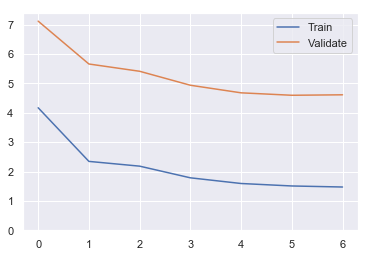

In [135]:
plt.plot(range(len(training_mse_ridge)), training_mse_ridge, label='Train')
plt.plot(range(len(validation_mse_ridge)), validation_mse_ridge, label='Validate')
plt.ylim(0)
plt.legend()

Much better already. We can tell that we're not really overfitting the data now. In fact, we may be underfitting it.

In [136]:
training_mse_ridge = []
validation_mse_ridge = []
for X_expanded in X_list:
    ridge_reg = Ridge(alpha=0.2)
    ridge_reg.fit(X_expanded, y_train)
    y_pred = ridge_reg.predict(X_expanded)

    # Training score
    train_score = ridge_reg.score(X_expanded, y_train)
    train_mse = mean_squared_error(y_train, y_pred)
    training_mse_ridge.append(train_mse)
    
    # Validation score
    cv_score = np.mean(cross_val_score(ridge_reg, X_expanded, y_train, cv=5))
    cv_mse = -np.mean(cross_val_score(ridge_reg, X_expanded, y_train, cv=5, scoring='neg_mean_squared_error'))
    validation_mse_ridge.append(cv_mse)

    print(train_score, train_mse, "|||", cv_score, cv_mse)

0.8736183448677639 3.4686764653006437 ||| 0.76480671770063 6.417506548778287
0.9199818503847712 2.196181653712601 ||| 0.7773519129791108 5.542024509102764
0.9258281993351588 2.035722503285064 ||| 0.7887027861233694 5.297619295858005
0.9397395186335592 1.6539118219709525 ||| 0.8098531931573086 4.801889038603186
0.9455946078225365 1.4932127865706701 ||| 0.8169993088818197 4.608197688592373
0.947795095112305 1.4328181156334445 ||| 0.8167981466676284 4.597291889289148
0.9486657765292746 1.4089213551688229 ||| 0.8134453606517498 4.676133585841127


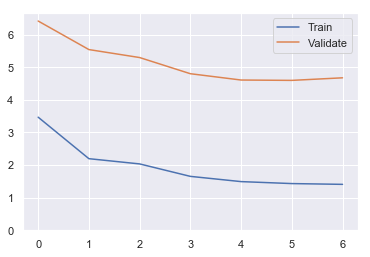

In [137]:
plt.plot(range(len(training_mse_ridge)), training_mse_ridge, label='Train')
plt.plot(range(len(validation_mse_ridge)), validation_mse_ridge, label='Validate')
plt.ylim(0)
plt.legend()